# Mapping data to the Self-organizing Map

In this tutorial we present the procedure of mapping data to a trained SOM.

First the trained SOM will be loaded:

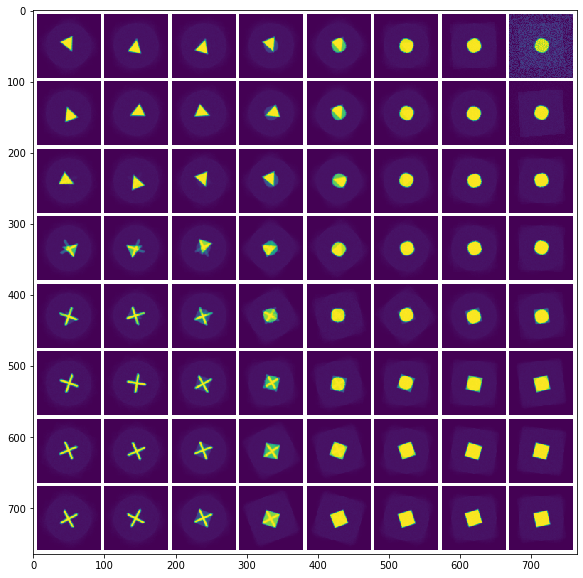

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pink
import tools

np_som = np.load("data/som-shapes-cartesian2d-8x8.npy")
som = pink.SOM(np_som)

fig = plt.figure(figsize=(10,10))
plt.imshow(tools.show(som, border=5))

Load data image, which should be mapped.

shape:      (64, 64)
min value:  4.5595434e-06
max value:  1.0


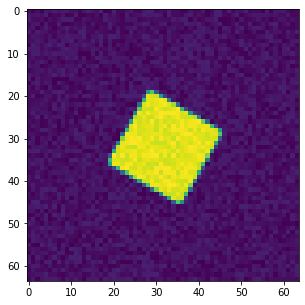

In [2]:
image = np.load("data/shapes/boxes.npy").astype(np.float32)[0]
#image = np.load("data/shapes/circles.npy").astype(np.float32)[0]
#image = np.load("data/shapes/crosses.npy").astype(np.float32)[0]
#image = np.load("data/shapes/triangles.npy").astype(np.float32)[0]
image /= np.amax(image)

fig = plt.figure(figsize=(5,5))
plt.imshow(image)

print('shape:     ', image.shape)
print('min value: ', np.amin(image))
print('max value: ', np.amax(image))

The Mapper is calculating the euclidean distance to each neuron, which indicate the similarity to each neuron. The second return value gives the transformation operation index for the best similarity. The storage order is identical to the SOM.

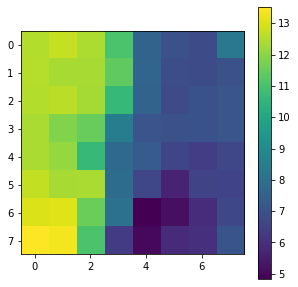

In [3]:
number_of_rotations = 360

mapper = pink.Mapper(som, number_of_rotations=number_of_rotations)
euclidean_distances, transformations = mapper(pink.Data(image))

heatmap = np.array(euclidean_distances).reshape(8, 8)

fig = plt.figure(figsize=(5,5))
plt.imshow(heatmap)
plt.colorbar()

The second return value gives the transformation operation index for the best similarity.

In [4]:
print(np.array(transformations).reshape(8, 8))

[[671 311 311 672 408  46 498 136]
 [491 402 221 401 408 138  48 228]
 [221 491 671 672 138 136 498 408]
 [ 27 567 131 582 318 498 498 228]
 [474 205 294 671 226 406 581 478]
 [384 436 294 116 298 204  24 470]
 [114  24 201  24 196 376 286 288]
 [294 564 198 288 465 465 645 468]]


From the transformation index the information if the image was flipped can be extracted by checking if the it is larger or equal than the number of rotations ...

In [5]:
is_flipped = (np.array(transformations).reshape(8, 8) >= number_of_rotations)
print(is_flipped)

[[ True False False  True  True False  True False]
 [ True  True False  True  True False False False]
 [False  True  True  True False False  True  True]
 [False  True False  True False  True  True False]
 [ True False False  True False  True  True  True]
 [ True  True False False False False False  True]
 [False False False False False  True False False]
 [False  True False False  True  True  True  True]]


... and the rotation angle in radian by multiplication with 2 * pi / the number of rotations.

In [6]:
import math

rotation_angle = ((np.array(transformations).reshape(8, 8) - is_flipped * number_of_rotations)
               * 2 * math.pi / number_of_rotations)
np.set_printoptions(precision=2)
print(rotation_angle)

[[5.43 5.43 5.43 5.45 0.84 0.8  2.41 2.37]
 [2.29 0.73 3.86 0.72 0.84 2.41 0.84 3.98]
 [3.86 2.29 5.43 5.45 2.41 2.37 2.41 0.84]
 [0.47 3.61 2.29 3.87 5.55 2.41 2.41 3.98]
 [1.99 3.58 5.13 5.43 3.94 0.8  3.86 2.06]
 [0.42 1.33 5.13 2.02 5.2  3.56 0.42 1.92]
 [1.99 0.42 3.51 0.42 3.42 0.28 4.99 5.03]
 [5.13 3.56 3.46 5.03 1.83 1.83 4.97 1.88]]
